In [1]:
# Download dataset
!pip install -q gdown

# plant_leave_diseases_train.zip
!gdown https://drive.google.com/uc?id=1MCQ2ldiKZUeVM1rVw1gPlBaX43AJB3R0

# plant_leave_diseases_test.zip
!gdown https://drive.google.com/uc?id=1yqvfEVeb0IAutxZK83_wUoUWm5apYSF8

Downloading...
From (original): https://drive.google.com/uc?id=1MCQ2ldiKZUeVM1rVw1gPlBaX43AJB3R0
From (redirected): https://drive.google.com/uc?id=1MCQ2ldiKZUeVM1rVw1gPlBaX43AJB3R0&confirm=t&uuid=94bf367a-9d1d-48e6-8c06-80090b0fc4d4
To: /content/plant_leave_diseases_train.zip
100% 682M/682M [00:08<00:00, 84.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1yqvfEVeb0IAutxZK83_wUoUWm5apYSF8
From (redirected): https://drive.google.com/uc?id=1yqvfEVeb0IAutxZK83_wUoUWm5apYSF8&confirm=t&uuid=f614727f-1e56-4773-8e64-5fee6c3e6855
To: /content/plant_leave_diseases_test.zip
100% 170M/170M [00:02<00:00, 78.4MB/s]


In [3]:
import zipfile

# Unzip data
with zipfile.ZipFile('plant_leave_diseases_train.zip', 'r') as zip_file:
    zip_file.extractall()

with zipfile.ZipFile('plant_leave_diseases_test.zip', 'r') as zip_file:
    zip_file.extractall()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# Paths to your folders
train_data_dir = 'plant_leave_diseases_train'

# Image settings
img_size = (256, 256)
batch_size = 32

# Create a ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 34756 images belonging to 38 classes.
Found 8673 images belonging to 38 classes.


In [5]:
# Build CNN model
model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=9)
# Save model
model.save("plant_disease_model.h5")
print("✅ Model saved as 'plant_disease_model.h5'")

Epoch 1/9


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 102s 86ms/step - accuracy: 0.4255 - loss: 2.2040 - val_accuracy: 0.7836 - val_loss: 0.7199
Epoch 2/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.7334 - loss: 0.8739 - val_accuracy: 0.8360 - val_loss: 0.5348
Epoch 3/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 88s 81ms/step - accuracy: 0.8026 - loss: 0.6196 - val_accuracy: 0.8837 - val_loss: 0.3788
Epoch 4/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 88s 81ms/step - accuracy: 0.8470 - loss: 0.4799 - val_accuracy: 0.9021 - val_loss: 0.3232
Epoch 5/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.8758 - loss: 0.3731 - val_accuracy: 0.9168 - val_loss: 0.2697
Epoch 6/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 90s 83ms/step - accuracy: 0.8990 - loss: 0.3075 - val_accuracy: 0.8976 - val_loss: 0.3507
Epoch 7/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.9165 - loss: 0.2517 - val_accuracy: 0.9155 - val_loss: 0.2963
Epoch 8/9
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.9275 - loss: 0.2184 - v

✅ Model saved as 'plant_disease_model.h5'


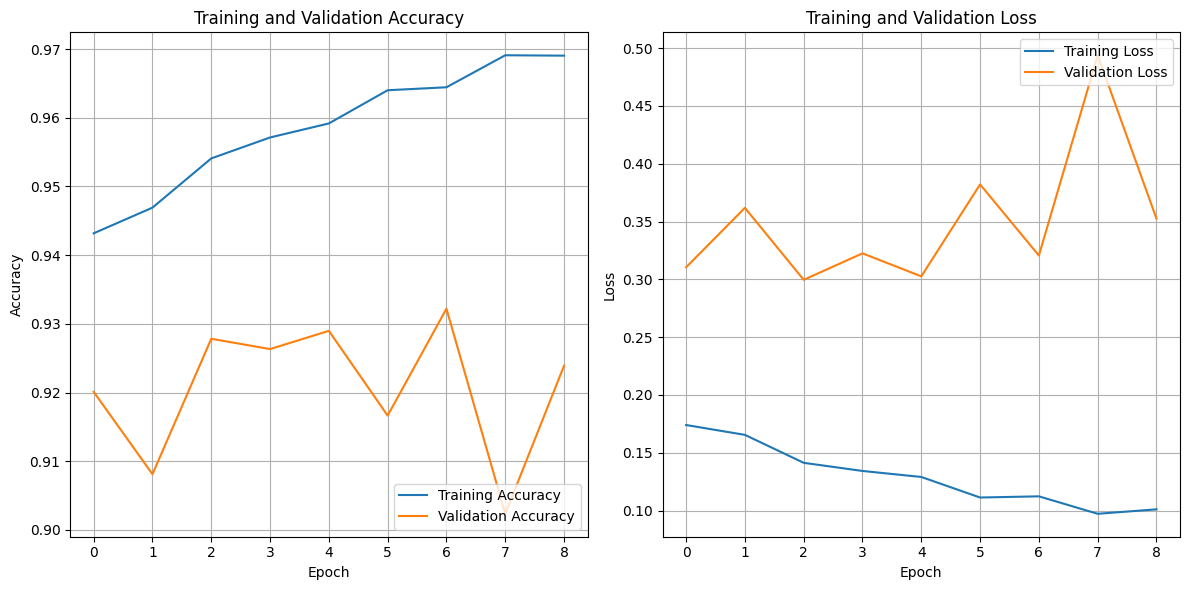

In [9]:
# Get training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = tf.keras.models.load_model("plant_disease_model.h5")
print("✅ Model loaded successfully")

# Define test data path and image size
test_data_dir = 'plant_leave_diseases_test'  # this should be the unzipped test folder
img_size = (256, 256)

# Get class names from the training generator (you can hardcode if needed)
class_names = list(train_generator.class_indices.keys())

# Prepare list to store predictions
predictions = []

# Loop through all test images
for img_name in os.listdir(test_data_dir):
    img_path = os.path.join(test_data_dir, img_name)

    # Load and preprocess image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]

    # Append to results
    predictions.append({
        "filename": img_name,
        "predicted_label": pred_class
    })

# Save to CSV
df = pd.DataFrame(predictions)
df.to_csv("test_predictions.csv", index=False)
print("📄 Predictions saved to test_predictions.csv")


✅ Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = tf.keras.models.load_model("plant_disease_model.h5")
print("✅ Model loaded successfully")

# Define test data path and image size
test_data_dir = 'plant_leave_diseases_test'
img_size = (256, 256)

# Get class names from the training generator (hardcode if not available)
class_names = list(train_generator.class_indices.keys())
# Or if not using train_generator, replace this line with:
# class_names = ['Apple___Black_rot', 'Apple___healthy', 'Corn___Cercospora_leaf_spot', ...]  # your classes

# Store predictions
predictions = []

# 🔧 SORT filenames to ensure consistent order
for img_name in sorted(os.listdir(test_data_dir)):
    img_path = os.path.join(test_data_dir, img_name)

    # Load and preprocess image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array, verbose=0)
    pred_class = class_names[np.argmax(pred)]

    # Record prediction
    predictions.append({
        "filename": img_name,
        "predicted_label": pred_class
    })

# Save predictions to CSV
df = pd.DataFrame(predictions)
df.to_csv("test_predictions.csv", index=False)
print("📄 Predictions saved to test_predictions.csv")